In [986]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import math as m
from scipy.optimize import curve_fit
import time
import matplotlib.colors as colors
from scipy.special import ellipk, ellipj
from scipy.integrate import odeint
from metode import *
from scipy.misc import derivative
import matplotlib.animation as animation

In [987]:
omega = 0.316
g = 9.81

In [988]:
# Matematično nihalo

def mat_nihalo_sila(theta, omega=0.36):             
    return -omega**2 * np.sin(theta)
    
def mat_nihalo_sistem(y, t):
    theta, kotna_v = y
    kot_posp = mat_nihalo_sila(theta, omega)
    return np.array([kotna_v, kot_posp])

def mat_nihalo_sistem1(y, t):
    theta, kotna_v = y
    kot_posp = mat_nihalo_sila(theta, omega_0)
    return np.array([kotna_v, kot_posp])


def mat_nihalo_energija(theta, kotna_v):
    return omega**2 * theta**2 / 2. + kotna_v**2 / 2


In [1060]:
# Analiticna resitev matematičnega nihala

def analiticno_mat_nihalo(theta_0, t):
    K = ellipk(np.sin(theta_0/2)**2)
    theta = 2 * np.arcsin(np.sin(theta_0/2) * ellipj(K - omega * t, np.sin(theta_0/2)**2)[0])
    return theta

def analiticno_mat_nihalo_v(theta_0,t):
    #Rešitev za v
    #v = derivative(analiticno_mat_nihalo, t, dx=1e-3, args = (theta_0,))
    #v = derivative(lambda t_val: analiticno_mat_nihalo(theta_0, omega, t_val), t, dx=1e-3)
    v = np.gradient(analiticno_mat_nihalo(theta_0, t))
    
    return v


def tocna_resitev_nihala(theta_0, omega_0, t):
    s = np.sin(theta_0 / 2)
    elip = ellipk(s**2)
    sn = ellipj(elip - omega_0 * t, s**2)[0]
    return 2 * np.arcsin(s * sn)



In [836]:
'''# Example usage:
from scipy.integrate import odeint

# Define initial conditions
y0 = [0.1, 0]  # [theta_0, kotna_hitrost_0]
t = np.linspace(0, 10, 100)  # Time array

# Call ODE solver
result = odeint(duseno_nihalo, y0, t, args=(v_0, omega, beta))
'''

'# Example usage:\nfrom scipy.integrate import odeint\n\n# Define initial conditions\ny0 = [0.1, 0]  # [theta_0, kotna_hitrost_0]\nt = np.linspace(0, 10, 100)  # Time array\n\n# Call ODE solver\nresult = odeint(duseno_nihalo, y0, t, args=(v_0, omega, beta))\n'

In [990]:
# Dušeno nihalo, ki ga vzbujamo
beta = 30
v_zun_0 = 2

def Duseno_sila(y, v, t, B=30, omega=0.316, omega_0=1, kotna_v_0=2):
    return -B * v - omega**2 * np.sin(y) + kotna_v_0 * np.cos(omega_0 * t)

def duseno_nihalo (y, t, v_zun, omega_0, beta):
    theta, kot_v = y
    kot_posp = v_zun * np.cos(omega_0 * t) - omega**2 * np.sin(theta) - beta * kot_v
    dydt = np.array([kot_v, kot_posp])
    return dydt

In [991]:
#Van der Polov oscilator
lam =1
v_zun_0 = 1
omega_zun_0 = 1

def van_der_pol_sila(theta, kot_v, t, lam, v_zun_0, omega_zun_0):
    return lam * kot_v * (1 - theta**2) - theta + v_zun_0 * np.cos(omega_zun_0 * t)
    
def van_der_pol_nihalo(y, t, lam, v_zun_0, omega_zun_0):
    theta, kot_v = y
    kot_posp = van_der_pol_sila(theta, kot_v, t, lam, v_zun_0, omega_zun_0)
    dydt = np.array([kot_v, kot_posp])
    return dydt

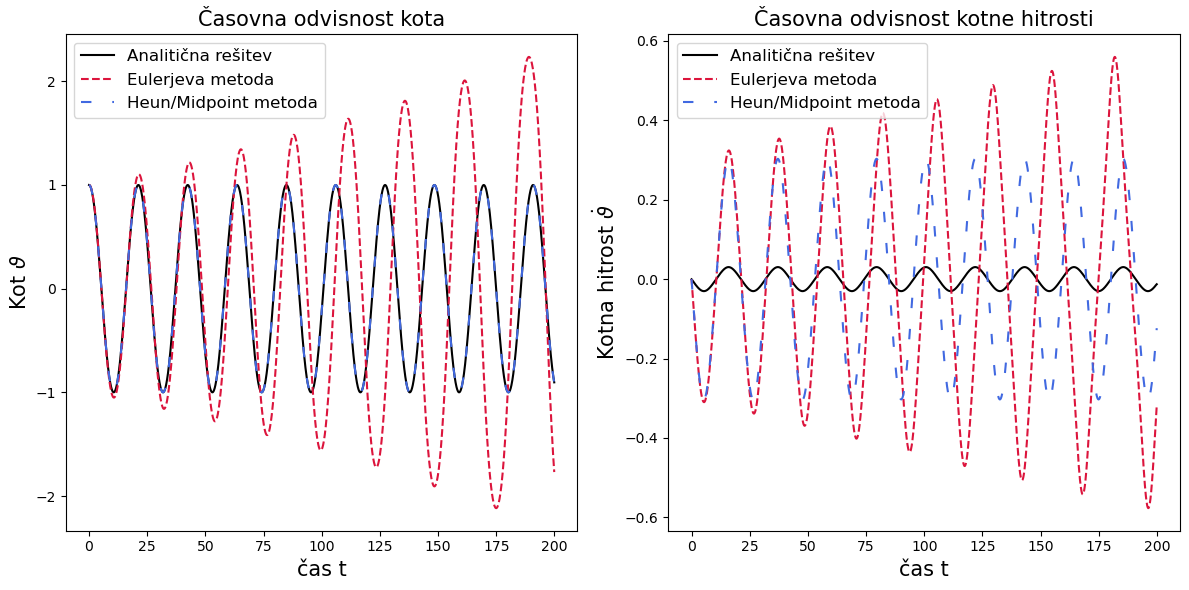

In [992]:
#Numerične rešitve
def res():
    dt = 0.1
    t = np.arange(0.0,200, dt)  
    theta_0 = 1 
    kotna_v_0 = 0.0  
    zac_pogoji = np.array([theta_0, kotna_v_0])

    anal = analiticno_mat_nihalo(theta_0, t) 
    analhit = analiticno_mat_nihalo_v(theta_0, t)  

    x_heun = heun(mat_nihalo_sistem, zac_pogoji, t)
    x_euler = euler(mat_nihalo_sistem, zac_pogoji, t)

    fig1, ax1 = plt.subplots(ncols=2, figsize=(12, 6))

    # Graf kota theta
    ax1[0].plot(t, anal, color='black', label='Analitična rešitev')
    ax1[0].plot(t, x_euler[:, 0], linestyle='dashed', color='crimson', label='Eulerjeva metoda')
    ax1[0].plot(t, x_heun[:, 0], linestyle=(0, (5, 10)), color='royalblue', label='Heun/Midpoint metoda')
    ax1[0].set_title('Časovna odvisnost kota', fontsize=15)
    ax1[0].set_xlabel('čas t', fontsize=15)
    ax1[0].set_ylabel(r'Kot $\vartheta$', fontsize=15)
    ax1[0].legend(fontsize=12)

    # Grah kotne hitrosti
    ax1[1].plot(t, analhit, color='black', label='Analitična rešitev')
    ax1[1].plot(t, x_euler[:, 1], linestyle='dashed', color='crimson', label='Eulerjeva metoda')
    ax1[1].plot(t, x_heun[:, 1], linestyle=(0, (5, 10)), color='royalblue', label='Heun/Midpoint metoda')
    ax1[1].set_title('Časovna odvisnost kotne hitrosti', fontsize=15)
    ax1[1].set_xlabel('čas t', fontsize=15)
    ax1[1].set_ylabel(r'Kotna hitrost $\dot{\vartheta}$', fontsize=15)
    ax1[1].legend(fontsize=12)

    plt.tight_layout()
    plt.savefig('euler heun 1.png')
    plt.show()

res()

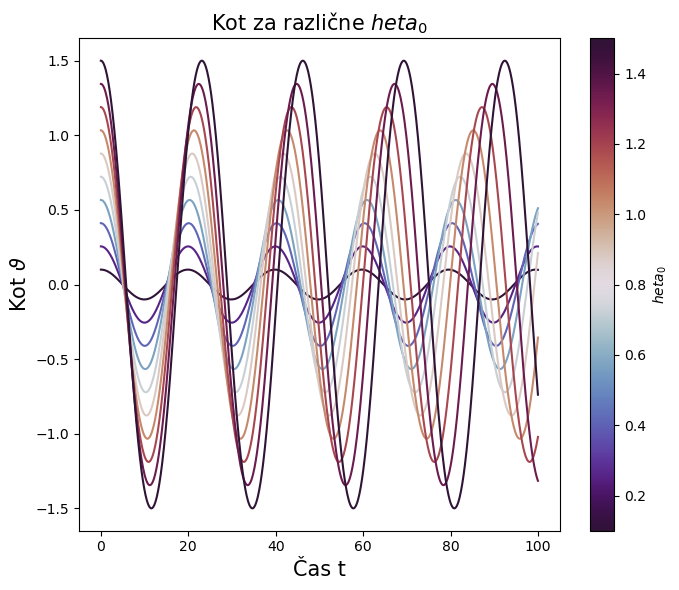

In [1070]:
def plot_anal_res():
    theta_vrednosti = np.linspace(0.1, 1.5, 10)  
    t = np.linspace(0, 100, 1000)
    norm = mcolors.Normalize(vmin=min(theta_vrednosti), vmax=max(theta_vrednosti))
    cmap = cm.twilight_shifted

    fig, ax = plt.subplots(figsize=(7, 6))

    for theta_0 in theta_vrednosti:
        analiticna_resitev = analiticno_mat_nihalo(theta_0, t)
        barva = cmap(norm(theta_0))
        ax.plot(t, analiticna_resitev, color=barva, linestyle='-', label=f'$\theta_0$ = {theta_0:.2f}')

    ax.set_title('Kot za različne $\theta_0$', fontsize=15)
    ax.set_xlabel('Čas t', fontsize=15)
    ax.set_ylabel(r'Kot $\vartheta$', fontsize=15)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical', label='$\theta_0$')

    plt.tight_layout()
    fig.savefig('analiticne_resitve_theta.png', dpi=300, bbox_inches='tight')

    plt.show()

plot_anal_res()

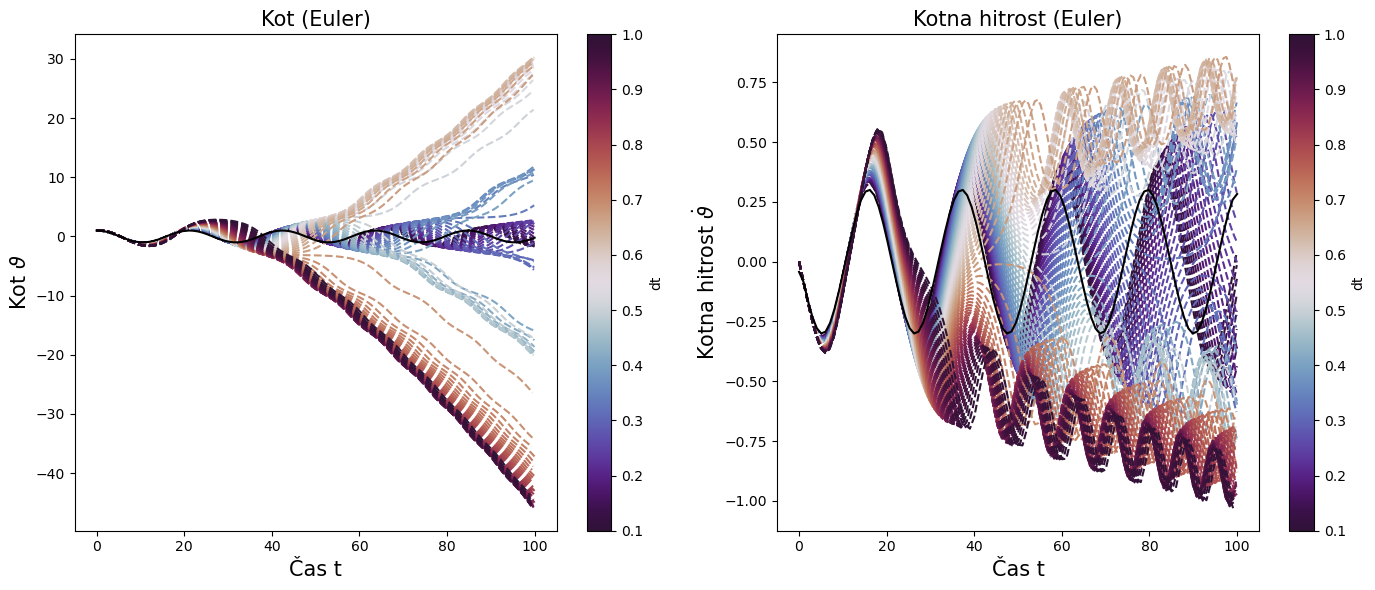

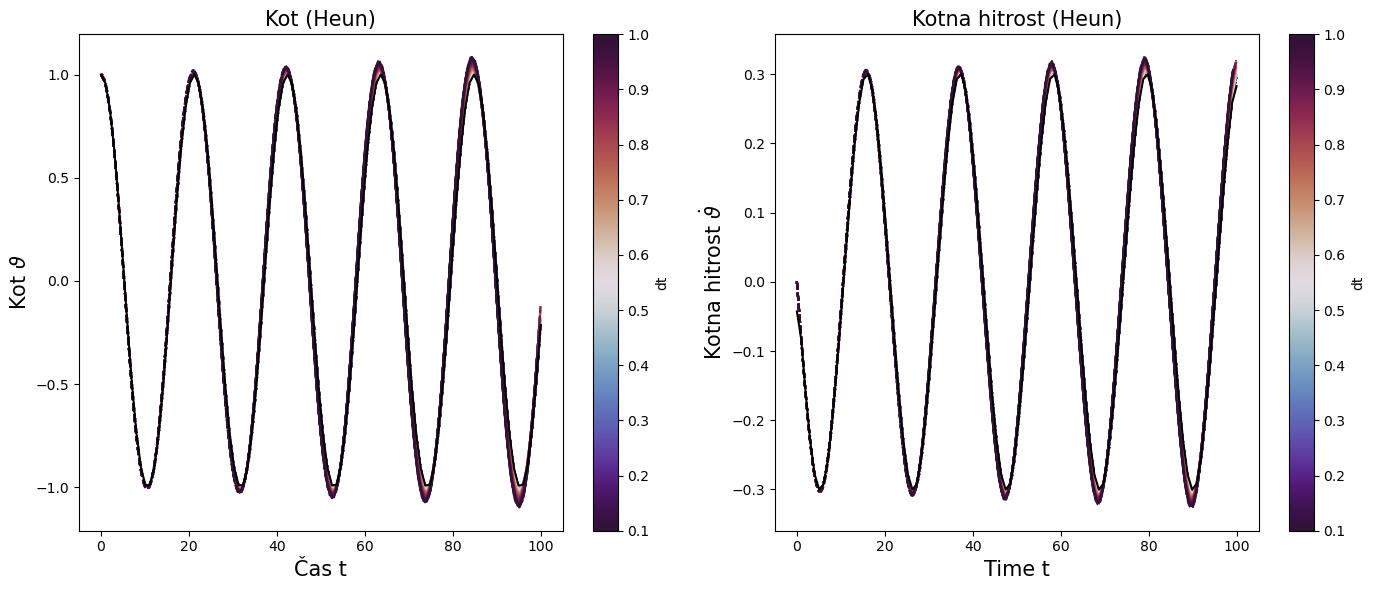

In [1071]:
def res1():
    dt_vred = np.linspace(0.1, 1, 100)
    theta_0 = 1 
    kotna_v_0 = 0.0  
    t_max = 100  
    zac_pogoji = np.array([theta_0, kotna_v_0])

    t_anal = np.linspace(0, t_max, 100)
    anal = analiticno_mat_nihalo(theta_0, t_anal)
    analhit = analiticno_mat_nihalo_v(theta_0, t_anal)

    norm = mcolors.Normalize(vmin=dt_vred.min(), vmax=dt_vred.max())
    cmap = cm.twilight_shifted

    fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_vred:
        t = np.arange(0, t_max, dt)
        x_euler = euler(mat_nihalo_sistem, zac_pogoji, t)
        color = cmap(norm(dt))
        ax1[0].plot(t, x_euler[:, 0], color=color, linestyle='--', label=f'Euler dt={dt:.2f}')
        ax1[1].plot(t, x_euler[:, 1], color=color, linestyle='--', label=f'Euler dt={dt:.2f}')

    ax1[0].plot(t_anal, anal, color='black', label='Analytical Solution (Angle)')
    ax1[1].plot(t_anal, analhit, color='black', label='Analytical Solution (Angular Speed)')

    ax1[0].set_title('Kot (Euler)', fontsize=15)
    ax1[0].set_xlabel('Čas t', fontsize=15)
    ax1[0].set_ylabel(r'Kot $\vartheta$', fontsize=15)

    ax1[1].set_title('Kotna hitrost (Euler)', fontsize=15)
    ax1[1].set_xlabel('Čas t', fontsize=15)
    ax1[1].set_ylabel(r'Kotna hitrost $\dot{\vartheta}$', fontsize=15)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig1.colorbar(sm, ax=ax1[0], orientation='vertical', label='dt')
    fig1.colorbar(sm, ax=ax1[1], orientation='vertical', label='dt')

    plt.tight_layout()
    fig1.savefig('euler_methods_upper.png', dpi=300, bbox_inches='tight')

    fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_vred:
        t = np.arange(0, t_max, dt)
        x_heun = heun(mat_nihalo_sistem, zac_pogoji, t)
        color = cmap(norm(dt))
        ax2[0].plot(t, x_heun[:, 0], color=color, linestyle='--', label=f'Heun dt={dt:.2f}')
        ax2[1].plot(t, x_heun[:, 1], color=color, linestyle='--', label=f'Heun dt={dt:.2f}')

    ax2[0].plot(t_anal, anal, color='black', label='Analytical Solution (Angle)')
    ax2[1].plot(t_anal, analhit, color='black', label='Analytical Solution (Angular Speed)')

    ax2[0].set_title('Kot (Heun)', fontsize=15)
    ax2[0].set_xlabel('Čas t', fontsize=15)
    ax2[0].set_ylabel(r'Kot $\vartheta$', fontsize=15)

    ax2[1].set_title('Kotna hitrost (Heun)', fontsize=15)
    ax2[1].set_xlabel('Time t', fontsize=15)
    ax2[1].set_ylabel(r'Kotna hitrost $\dot{\vartheta}$', fontsize=15)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig2.colorbar(sm, ax=ax2[0], orientation='vertical', label='dt')
    fig2.colorbar(sm, ax=ax2[1], orientation='vertical', label='dt')

    plt.tight_layout()
    fig2.savefig('heun_methods_lower.png', dpi=300, bbox_inches='tight')

    plt.show()

res1()

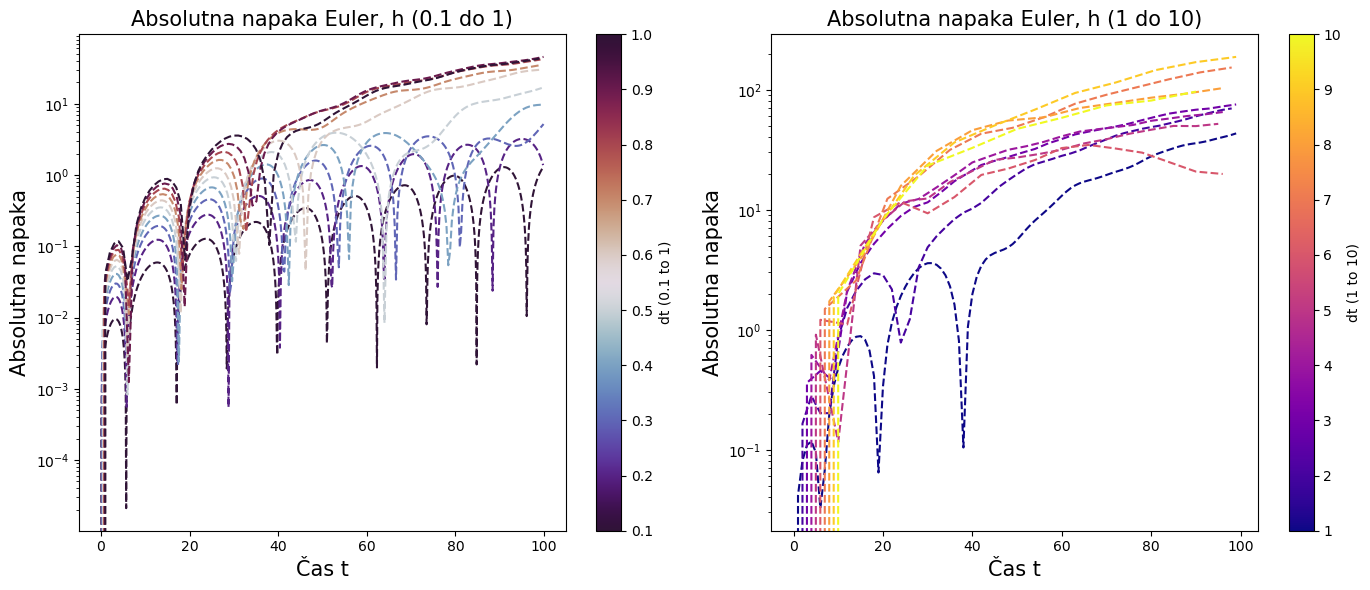

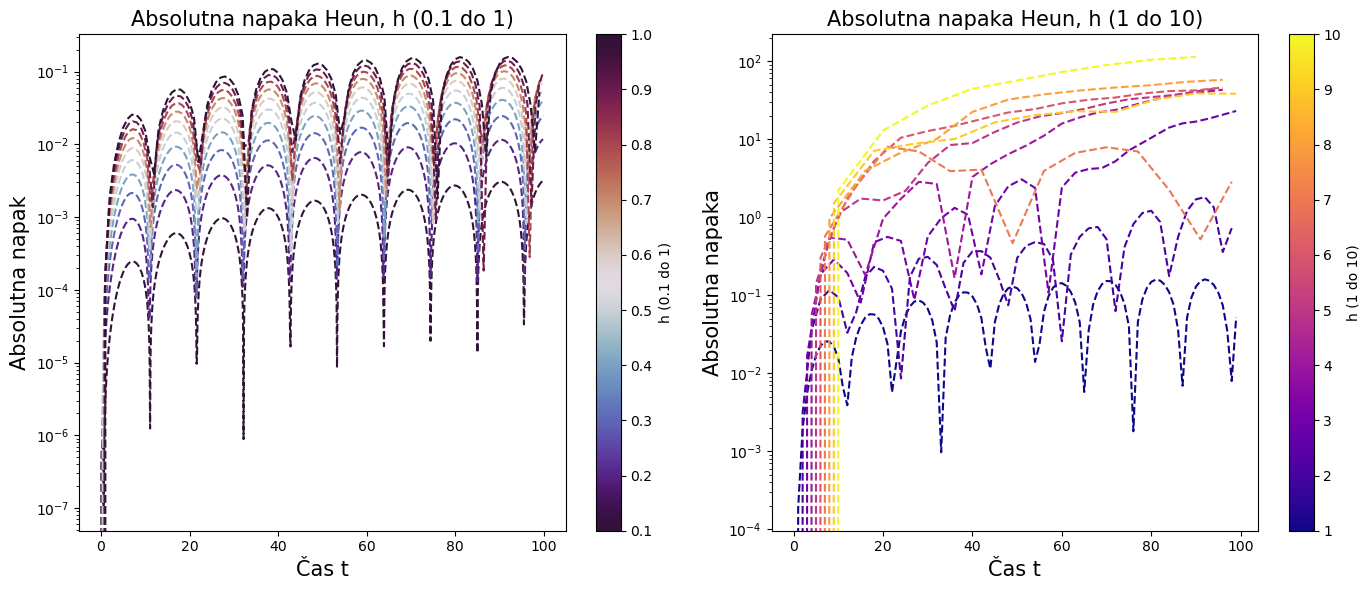

In [1013]:
def abs_error_res1():
    dt_values = np.linspace(0.1, 1.0, 10)
    dt_values_1 = np.linspace(1, 10, 10)
    theta_0 = 1 
    kotna_v_0 = 0.0  
    t_max = 100  
    zac_pogoji = np.array([theta_0, kotna_v_0])

    t_anal = np.linspace(0, t_max, 1000)
    anal = analiticno_mat_nihalo(theta_0, t_anal)

    cmap_small = cm.twilight_shifted
    cmap_large = cm.plasma
    norm_small = mcolors.Normalize(vmin=dt_values.min(), vmax=dt_values.max())
    norm_large = mcolors.Normalize(vmin=dt_values_1.min(), vmax=dt_values_1.max())

    fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_euler = euler(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_euler[:, 0])
        color = cmap_small(norm_small(dt))
        ax1[0].plot(t, abs_error, color=color, linestyle='--', label=f'Euler dt={dt:.2f}')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_euler = euler(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_euler[:, 0])
        color = cmap_large(norm_large(dt))
        ax1[1].plot(t, abs_error, color=color, linestyle='--', label=f'Euler dt={dt:.2f}')

    ax1[0].set_title('Absolutna napaka Euler, h (0.1 do 1)', fontsize=15)
    ax1[0].set_xlabel('Čas t', fontsize=15)
    ax1[0].set_ylabel('Absolutna napaka', fontsize=15)
    ax1[0].set_yscale('log')

    ax1[1].set_title('Absolutna napaka Euler, h (1 do 10)', fontsize=15)
    ax1[1].set_xlabel('Čas t', fontsize=15)
    ax1[1].set_ylabel('Absolutna napaka', fontsize=15)
    ax1[1].set_yscale('log')

    sm_small = cm.ScalarMappable(cmap=cmap_small, norm=norm_small)
    sm_small.set_array([])
    sm_large = cm.ScalarMappable(cmap=cmap_large, norm=norm_large)
    sm_large.set_array([])
    fig1.colorbar(sm_small, ax=ax1[0], orientation='vertical', label='dt (0.1 to 1)')
    fig1.colorbar(sm_large, ax=ax1[1], orientation='vertical', label='dt (1 to 10)')

    plt.tight_layout()
    fig1.savefig('euler_errors.png', dpi=300, bbox_inches='tight')

    fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_heun = heun(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_heun[:, 0])
        color = cmap_small(norm_small(dt))
        ax2[0].plot(t, abs_error, color=color, linestyle='--', label=f'Heun dt={dt:.2f}')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_heun = heun(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_heun[:, 0])
        color = cmap_large(norm_large(dt))
        ax2[1].plot(t, abs_error, color=color, linestyle='--', label=f'Heun dt={dt:.2f}')

    ax2[0].set_title('Absolutna napaka Heun, h (0.1 do 1)', fontsize=15)
    ax2[0].set_xlabel('Čas t', fontsize=15)
    ax2[0].set_ylabel('Absolutna napak', fontsize=15)
    ax2[0].set_yscale('log')

    ax2[1].set_title('Absolutna napaka Heun, h (1 do 10)', fontsize=15)
    ax2[1].set_xlabel('Čas t', fontsize=15)
    ax2[1].set_ylabel('Absolutna napaka', fontsize=15)
    ax2[1].set_yscale('log')

    fig2.colorbar(sm_small, ax=ax2[0], orientation='vertical', label='h (0.1 do 1)')
    fig2.colorbar(sm_large, ax=ax2[1], orientation='vertical', label='h (1 do 10)')

    plt.tight_layout()
    fig2.savefig('heun_errors.png', dpi=300, bbox_inches='tight')

    plt.show()

abs_error_res1()


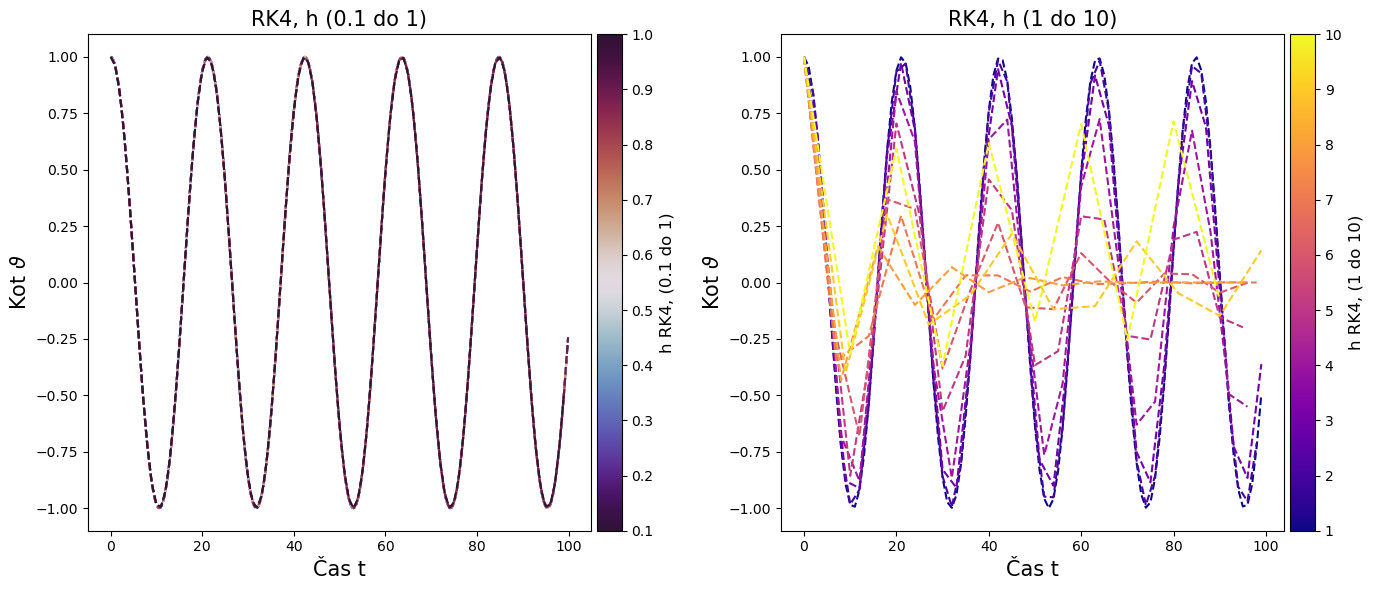

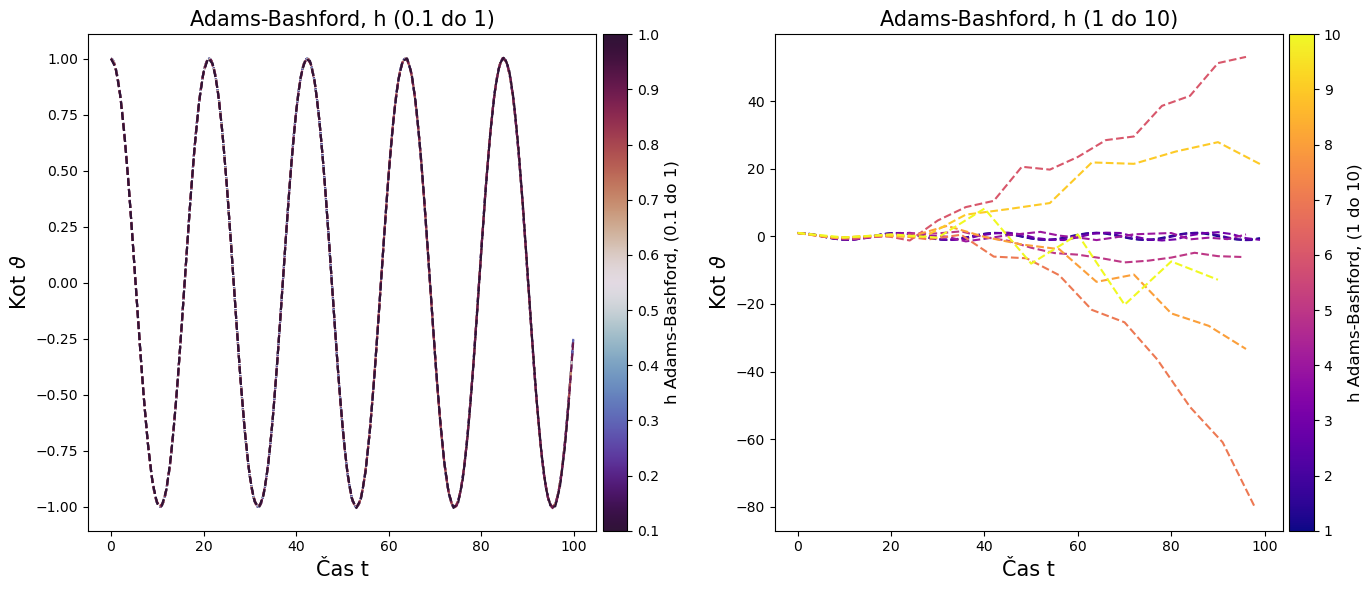

In [1001]:
def res2():
    dt_values = np.linspace(0.1, 1.0, 10)
    dt_values_1 = np.linspace(1, 10, 10)
    theta_0 = 1 
    kotna_v_0 = 0.0  
    t_max = 100 
    zac_pogoji = np.array([theta_0, kotna_v_0])
    
    t_anal = np.linspace(0, t_max, 1000)
    
    anal = analiticno_mat_nihalo(theta_0, t_anal)

    cmap_small = cm.twilight_shifted
    cmap_large = cm.plasma
    norm_small = mcolors.Normalize(vmin=dt_values.min(), vmax=dt_values.max())
    norm_large = mcolors.Normalize(vmin=dt_values_1.min(), vmax=dt_values_1.max())

    fig_rk4, ax_rk4 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_rk4 = rku4(mat_nihalo_sistem, zac_pogoji, t)
        color = cmap_small(norm_small(dt))
        ax_rk4[0].plot(t, x_rk4[:, 0], color=color, linestyle='--')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_rk4 = rku4(mat_nihalo_sistem, zac_pogoji, t)
        color = cmap_large(norm_large(dt))
        ax_rk4[1].plot(t, x_rk4[:, 0], color=color, linestyle='--')

    ax_rk4[0].set_title('RK4, h (0.1 do 1)', fontsize=15)
    ax_rk4[1].set_title('RK4, h (1 do 10)', fontsize=15)

    for ax in ax_rk4:
        ax.set_xlabel('Čas t', fontsize=15)
        ax.set_ylabel(r'Kot $\vartheta$', fontsize=15)

    sm_small = cm.ScalarMappable(cmap=cmap_small, norm=norm_small)
    sm_small.set_array([])
    sm_large = cm.ScalarMappable(cmap=cmap_large, norm=norm_large)
    sm_large.set_array([])

    cbar_rk4_small = plt.colorbar(sm_small, ax=ax_rk4[0], orientation='vertical', pad=0.01)
    cbar_rk4_large = plt.colorbar(sm_large, ax=ax_rk4[1], orientation='vertical', pad=0.01)

    cbar_rk4_small.set_label('h RK4, (0.1 do 1)', fontsize=12)
    cbar_rk4_large.set_label('h RK4, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('rk4_methods.png')
    plt.show()

    fig_pc, ax_pc = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_pc = pc4(mat_nihalo_sistem, zac_pogoji, t)
        color = cmap_small(norm_small(dt))
        ax_pc[0].plot(t, x_pc[:, 0], color=color, linestyle='--')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_pc = pc4(mat_nihalo_sistem, zac_pogoji, t)
        color = cmap_large(norm_large(dt))
        ax_pc[1].plot(t, x_pc[:, 0], color=color, linestyle='--')

    ax_pc[0].set_title('Adams-Bashford, h (0.1 do 1)', fontsize=15)
    ax_pc[1].set_title('Adams-Bashford, h (1 do 10)', fontsize=15)

    for ax in ax_pc:
        ax.set_xlabel('Čas t', fontsize=15)
        ax.set_ylabel(r'Kot $\vartheta$', fontsize=15)

    cbar_pc_small = plt.colorbar(sm_small, ax=ax_pc[0], orientation='vertical', pad=0.01)
    cbar_pc_large = plt.colorbar(sm_large, ax=ax_pc[1], orientation='vertical', pad=0.01)

    cbar_pc_small.set_label('h Adams-Bashford, (0.1 do 1)', fontsize=12)
    cbar_pc_large.set_label('h Adams-Bashford, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('adams_bashford_methods.png')
    plt.show()

res2()

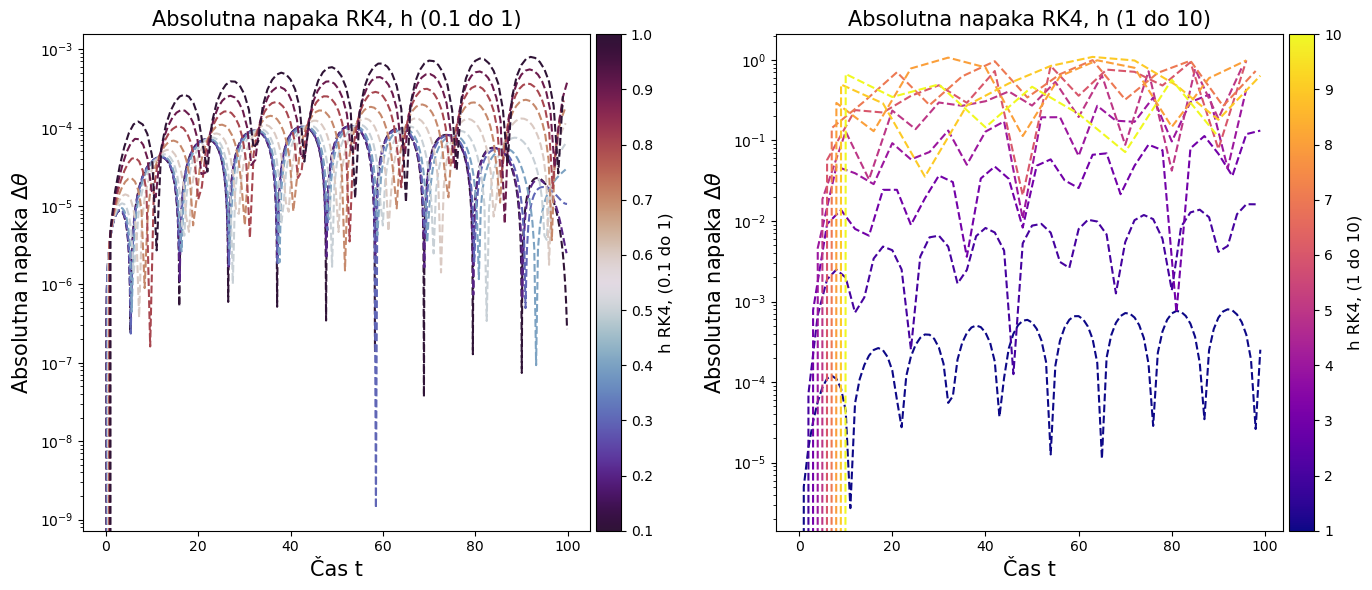

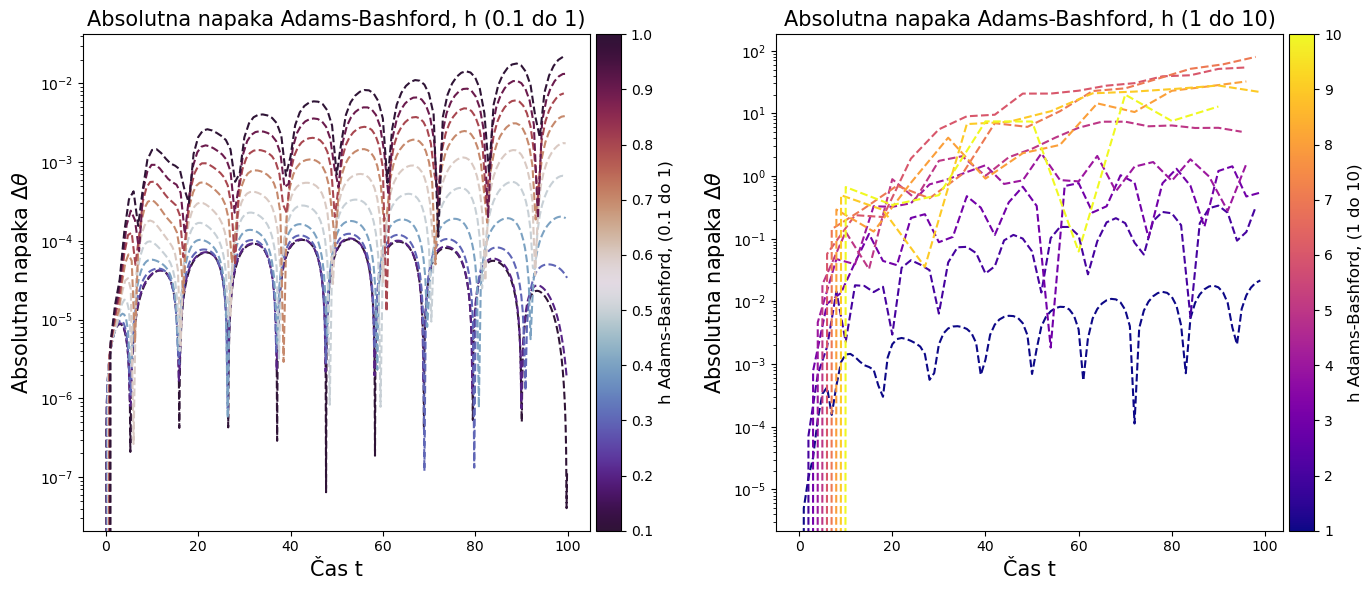

In [1002]:
def abs_error_res2():
    dt_values = np.linspace(0.1, 1.0, 10)
    dt_values_1 = np.linspace(1, 10, 10)
    theta_0 = 1 
    kotna_v_0 = 0.0  
    t_max = 100
    zac_pogoji = np.array([theta_0, kotna_v_0])

    t_anal = np.linspace(0, t_max, 1000)
    anal = analiticno_mat_nihalo(theta_0, t_anal)

    cmap_small = cm.twilight_shifted
    cmap_large = cm.plasma
    norm_small = mcolors.Normalize(vmin=dt_values.min(), vmax=dt_values.max())
    norm_large = mcolors.Normalize(vmin=dt_values_1.min(), vmax=dt_values_1.max())

    fig_rk4, ax_rk4 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_rk4 = rku4(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_rk4[:, 0])
        color = cmap_small(norm_small(dt))
        ax_rk4[0].plot(t, abs_error, color=color, linestyle='--')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_rk4 = rku4(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_rk4[:, 0])
        color = cmap_large(norm_large(dt))
        ax_rk4[1].plot(t, abs_error, color=color, linestyle='--')

    ax_rk4[0].set_title('Absolutna napaka RK4, h (0.1 do 1)', fontsize=15)
    ax_rk4[1].set_title('Absolutna napaka RK4, h (1 do 10)', fontsize=15)

    for ax in ax_rk4:
        ax.set_xlabel('Čas t', fontsize=15)
        ax.set_ylabel(r'Absolutna napaka $\Delta \theta$', fontsize=15)
        ax.set_yscale('log')

    sm_small = cm.ScalarMappable(cmap=cmap_small, norm=norm_small)
    sm_small.set_array([])
    sm_large = cm.ScalarMappable(cmap=cmap_large, norm=norm_large)
    sm_large.set_array([])

    cbar_rk4_small = plt.colorbar(sm_small, ax=ax_rk4[0], orientation='vertical', pad=0.01)
    cbar_rk4_large = plt.colorbar(sm_large, ax=ax_rk4[1], orientation='vertical', pad=0.01)

    cbar_rk4_small.set_label('h RK4, (0.1 do 1)', fontsize=12)
    cbar_rk4_large.set_label('h RK4, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('absolute_error_rk4.png')
    plt.show()

    fig_pc, ax_pc = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_pc = pc4(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_pc[:, 0])
        color = cmap_small(norm_small(dt))
        ax_pc[0].plot(t, abs_error, color=color, linestyle='--')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_pc = pc4(mat_nihalo_sistem, zac_pogoji, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_pc[:, 0])
        color = cmap_large(norm_large(dt))
        ax_pc[1].plot(t, abs_error, color=color, linestyle='--')

    ax_pc[0].set_title('Absolutna napaka Adams-Bashford, h (0.1 do 1)', fontsize=15)
    ax_pc[1].set_title('Absolutna napaka Adams-Bashford, h (1 do 10)', fontsize=15)

    for ax in ax_pc:
        ax.set_xlabel('Čas t', fontsize=15)
        ax.set_ylabel(r'Absolutna napaka $\Delta \theta$', fontsize=15)
        ax.set_yscale('log')

    cbar_pc_small = plt.colorbar(sm_small, ax=ax_pc[0], orientation='vertical', pad=0.01)
    cbar_pc_large = plt.colorbar(sm_large, ax=ax_pc[1], orientation='vertical', pad=0.01)

    cbar_pc_small.set_label('h Adams-Bashford, (0.1 do 1)', fontsize=12)
    cbar_pc_large.set_label('h Adams-Bashford, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('absolute_error_adams_bashford.png')
    plt.show()

abs_error_res2()


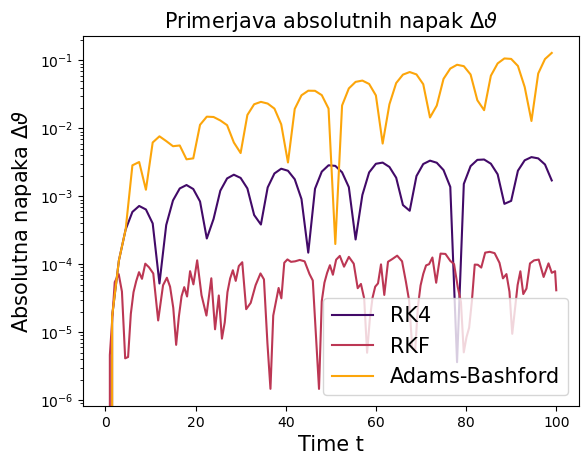

In [1047]:

def plot_absolute_errors1():
    theta_0 = 1
    kotna_v_0 = 0.0
    t_max = 100
    dt = 1.5
    zac_pogoji = np.array([theta_0, kotna_v_0])

    t_anal = np.linspace(0, t_max, 1000)
    anal = analiticno_mat_nihalo(theta_0, t_anal)
    t = np.arange(0, t_max, dt)

    x_rk4 = rku4(mat_nihalo_sistem, zac_pogoji, t)
    x_rkf = rkf(mat_nihalo_sistem, 0, t_max, zac_pogoji, 1e-6, 10, 0.001)
    x_pc = pc4(mat_nihalo_sistem, zac_pogoji, t)

    anal_interp = np.interp(t, t_anal, anal)
    abs_error_rk4 = np.abs(anal_interp - x_rk4[:, 0])
    abs_error_rkf = np.abs(np.interp(x_rkf[0], t_anal, anal) - x_rkf[1][:, 0])
    abs_error_pc = np.abs(anal_interp - x_pc[:, 0])

    plt.plot(t, abs_error_rk4, color=plt.cm.inferno(0.2), label='RK4')
    plt.plot(x_rkf[0], abs_error_rkf, color=plt.cm.inferno(0.5), label='RKF')
    plt.plot(t, abs_error_pc, color=plt.cm.inferno(0.8), label='Adams-Bashford')
    
    plt.yscale('log')
    plt.legend(fontsize=15)
    plt.xlabel('Time t', fontsize=15)
    plt.ylabel(r'Absolutna napaka $\Delta \vartheta$', fontsize=15)
    plt.title(r'Primerjava absolutnih napak $\Delta \vartheta$', fontsize=15)
    plt.savefig('primerjava prvih napak')
    plt.show()

plot_absolute_errors1()


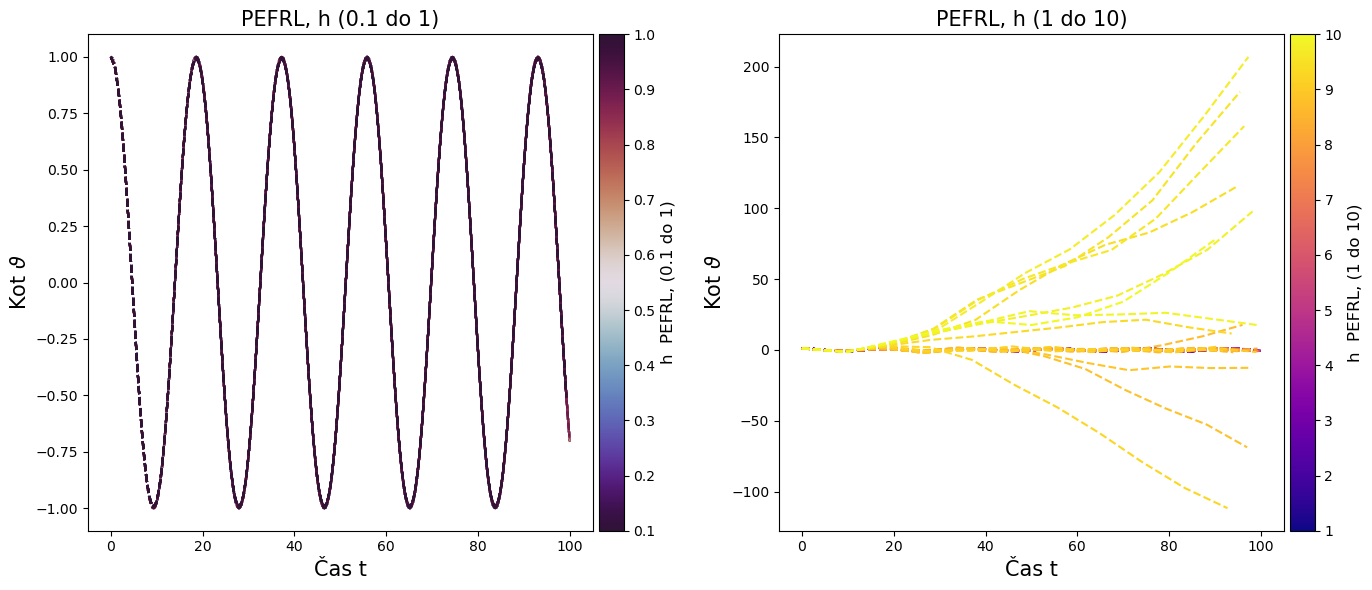

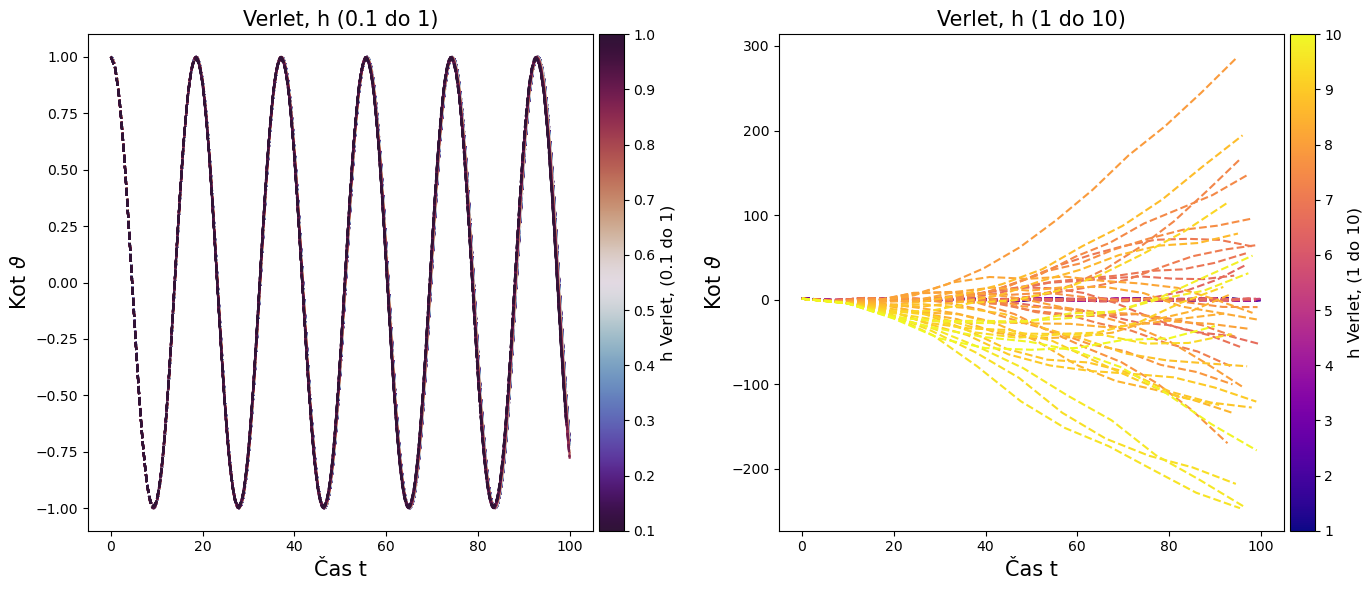

In [1010]:
def res3():
    dt_values_small = np.linspace(0.1, 1.0, 100)
    dt_values_large = np.linspace(1, 10, 100)
    t_max = 100  
    theta_0 = 1.0  
    kotna_v_0 = 0.0  

    t_anal = np.linspace(0, t_max, 1000)
    anal = analiticno_mat_nihalo(theta_0, t_anal)

    fig_pefrl, ax_pefrl = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    cmap_small = cm.twilight_shifted
    cmap_large = cm.plasma
    norm_small = mcolors.Normalize(vmin=dt_values_small.min(), vmax=dt_values_small.max())
    norm_large = mcolors.Normalize(vmin=dt_values_large.min(), vmax=dt_values_large.max())

    for dt in dt_values_small:
        t = np.arange(0, t_max, dt)
        x_pefrl = pefrl(mat_nihalo_sila, theta_0, kotna_v_0, t)
        color = cmap_small(norm_small(dt))
        ax_pefrl[0].plot(t, x_pefrl[0], color=color, linestyle='--')

    for dt in dt_values_large:
        t = np.arange(0, t_max, dt)
        x_pefrl = pefrl(mat_nihalo_sila, theta_0, kotna_v_0, t)
        color = cmap_large(norm_large(dt))
        ax_pefrl[1].plot(t, x_pefrl[0], color=color, linestyle='--')

    ax_pefrl[0].set_title('PEFRL, h (0.1 do 1)', fontsize=15)
    ax_pefrl[1].set_title('PEFRL, h (1 do 10)', fontsize=15)

    for i in range(2):
        ax_pefrl[i].set_xlabel('Čas t', fontsize=15)
        ax_pefrl[i].set_ylabel(r'Kot $\vartheta$', fontsize=15)

    sm_small_pefrl = cm.ScalarMappable(cmap=cmap_small, norm=norm_small)
    sm_small_pefrl.set_array([])
    sm_large_pefrl = cm.ScalarMappable(cmap=cmap_large, norm=norm_large)
    sm_large_pefrl.set_array([])

    cbar_pefrl_small = plt.colorbar(sm_small_pefrl, ax=ax_pefrl[0], orientation='vertical', pad=0.01)
    cbar_pefrl_large = plt.colorbar(sm_large_pefrl, ax=ax_pefrl[1], orientation='vertical', pad=0.01)
    cbar_pefrl_small.set_label('h  PEFRL, (0.1 do 1)', fontsize=12)
    cbar_pefrl_large.set_label('h  PEFRL, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('angle_vs_time_pefrl.png')
    plt.show()

    fig_verlet, ax_verlet = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values_small:
        t = np.arange(0, t_max, dt)
        x_verlet = verlet(mat_nihalo_sila, theta_0, kotna_v_0, t)
        color = cmap_small(norm_small(dt))
        ax_verlet[0].plot(t, x_verlet[0], color=color, linestyle='--')

    for dt in dt_values_large:
        t = np.arange(0, t_max, dt)
        x_verlet = verlet(mat_nihalo_sila, theta_0, kotna_v_0, t)
        color = cmap_large(norm_large(dt))
        ax_verlet[1].plot(t, x_verlet[0], color=color, linestyle='--')

    ax_verlet[0].set_title('Verlet, h (0.1 do 1)', fontsize=15)
    ax_verlet[1].set_title('Verlet, h (1 do 10)', fontsize=15)

    for i in range(2):
        ax_verlet[i].set_xlabel('Čas t', fontsize=15)
        ax_verlet[i].set_ylabel(r'Kot $\vartheta$', fontsize=15)

    sm_small_verlet = cm.ScalarMappable(cmap=cmap_small, norm=norm_small)
    sm_small_verlet.set_array([])
    sm_large_verlet = cm.ScalarMappable(cmap=cmap_large, norm=norm_large)
    sm_large_verlet.set_array([])

    cbar_verlet_small = plt.colorbar(sm_small_verlet, ax=ax_verlet[0], orientation='vertical', pad=0.01)
    cbar_verlet_large = plt.colorbar(sm_large_verlet, ax=ax_verlet[1], orientation='vertical', pad=0.01)
    cbar_verlet_small.set_label('h Verlet, (0.1 do 1)', fontsize=12)
    cbar_verlet_large.set_label('h Verlet, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('angle_vs_time_verlet.png')
    plt.show()

res3()


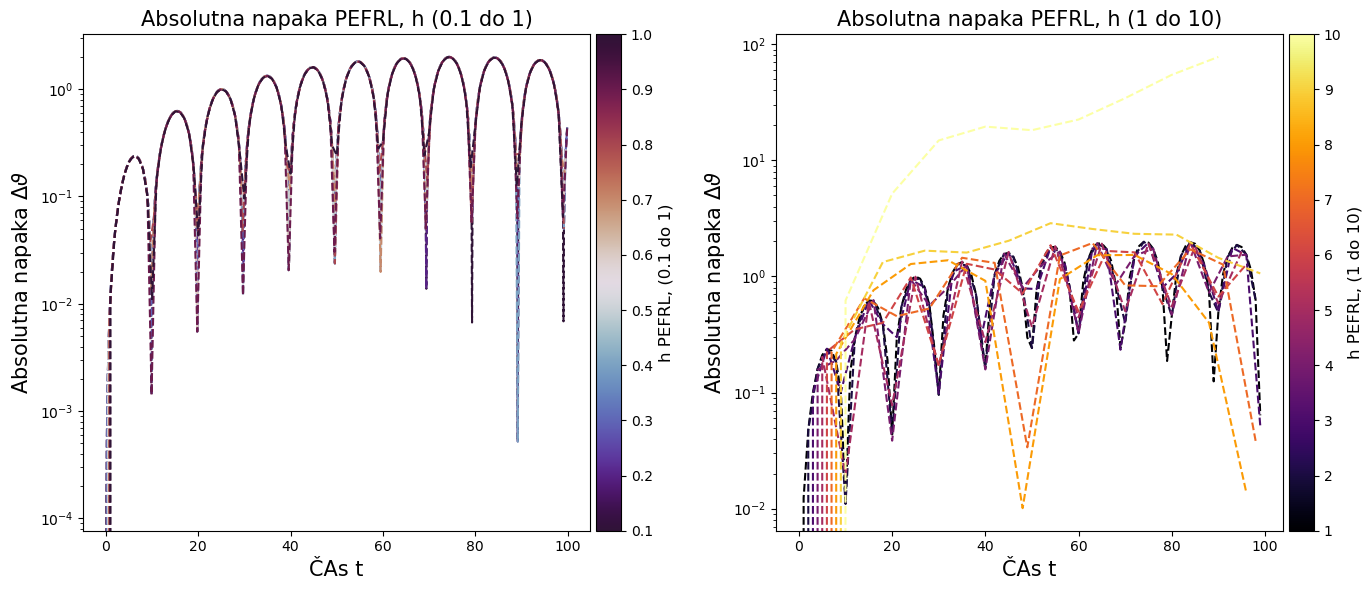

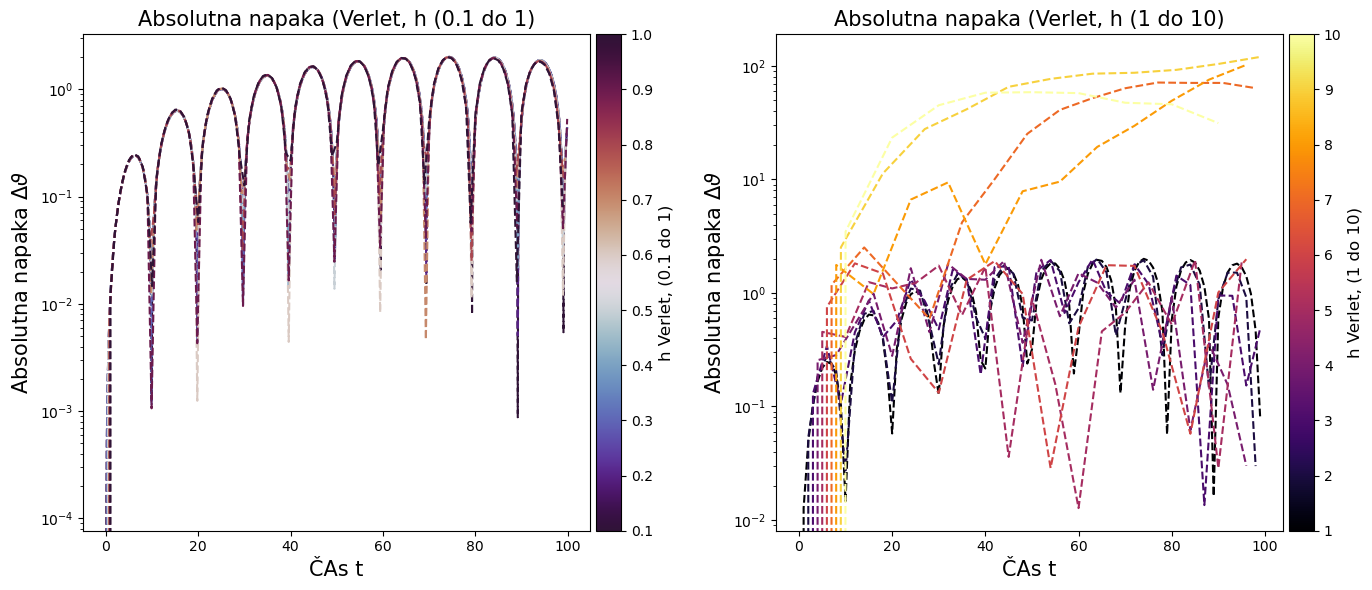

In [1012]:
def abs_error_res3():
    dt_values = np.linspace(0.1, 1.0, 10)
    dt_values_1 = np.linspace(1, 10, 10)
    theta_0 = 1.0
    kotna_v_0 = 0.0  
    t_max = 100

    t_anal = np.linspace(0, t_max, 1000)
    anal = analiticno_mat_nihalo(theta_0, t_anal)

    cmap_small = cm.twilight_shifted
    cmap_large = cm.inferno
    norm_small = mcolors.Normalize(vmin=dt_values.min(), vmax=dt_values.max())
    norm_large = mcolors.Normalize(vmin=dt_values_1.min(), vmax=dt_values_1.max())

    fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_pefrl = pefrl(mat_nihalo_sila, theta_0, kotna_v_0, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_pefrl[0])
        color = cmap_small(norm_small(dt))
        ax1[0].plot(t, abs_error, color=color, linestyle='--')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_pefrl = pefrl(mat_nihalo_sila, theta_0, kotna_v_0, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_pefrl[0])
        color = cmap_large(norm_large(dt))
        ax1[1].plot(t, abs_error, color=color, linestyle='--')

    ax1[0].set_title('Absolutna napaka PEFRL, h (0.1 do 1)', fontsize=15)
    ax1[1].set_title('Absolutna napaka PEFRL, h (1 do 10)', fontsize=15)

    for i in range(2):
        ax1[i].set_xlabel('ČAs t', fontsize=15)
        ax1[i].set_ylabel(r'Absolutna napaka $\Delta \vartheta$', fontsize=15)

    for i in range(2):
        ax1[i].set_yscale('log')

    sm_small_pefrl = cm.ScalarMappable(cmap=cmap_small, norm=norm_small)
    sm_small_pefrl.set_array([])
    sm_large_pefrl = cm.ScalarMappable(cmap=cmap_large, norm=norm_large)
    sm_large_pefrl.set_array([])

    cbar_pefrl_small = plt.colorbar(sm_small_pefrl, ax=ax1[0], orientation='vertical', pad=0.01)
    cbar_pefrl_large = plt.colorbar(sm_large_pefrl, ax=ax1[1], orientation='vertical', pad=0.01)
    cbar_pefrl_small.set_label('h PEFRL, (0.1 do 1)', fontsize=12)
    cbar_pefrl_large.set_label('h PEFRL, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('absolute_error_pefrl.png')
    plt.show()

    fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for dt in dt_values:
        t = np.arange(0, t_max, dt)
        x_verlet = verlet(mat_nihalo_sila, theta_0, kotna_v_0, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_verlet[0])
        color = cmap_small(norm_small(dt))
        ax2[0].plot(t, abs_error, color=color, linestyle='--')

    for dt in dt_values_1:
        t = np.arange(0, t_max, dt)
        x_verlet = verlet(mat_nihalo_sila, theta_0, kotna_v_0, t)
        anal_interp = np.interp(t, t_anal, anal)
        abs_error = np.abs(anal_interp - x_verlet[0])
        color = cmap_large(norm_large(dt))
        ax2[1].plot(t, abs_error, color=color, linestyle='--')

    ax2[0].set_title('Absolutna napaka (Verlet, h (0.1 do 1)', fontsize=15)
    ax2[1].set_title('Absolutna napaka (Verlet, h (1 do 10)', fontsize=15)

    for i in range(2):
        ax2[i].set_xlabel('ČAs t', fontsize=15)
        ax2[i].set_ylabel(r'Absolutna napaka $\Delta \vartheta$', fontsize=15)

    for i in range(2):
        ax2[i].set_yscale('log')

    sm_small_verlet = cm.ScalarMappable(cmap=cmap_small, norm=norm_small)
    sm_small_verlet.set_array([])
    sm_large_verlet = cm.ScalarMappable(cmap=cmap_large, norm=norm_large)
    sm_large_verlet.set_array([])

    cbar_verlet_small = plt.colorbar(sm_small_verlet, ax=ax2[0], orientation='vertical', pad=0.01)
    cbar_verlet_large = plt.colorbar(sm_large_verlet, ax=ax2[1], orientation='vertical', pad=0.01)
    cbar_verlet_small.set_label('h Verlet, (0.1 do 1)', fontsize=12)
    cbar_verlet_large.set_label('h Verlet, (1 do 10)', fontsize=12)

    plt.tight_layout()
    plt.savefig('absolute_error_verlet.png')
    plt.show()

abs_error_res3()



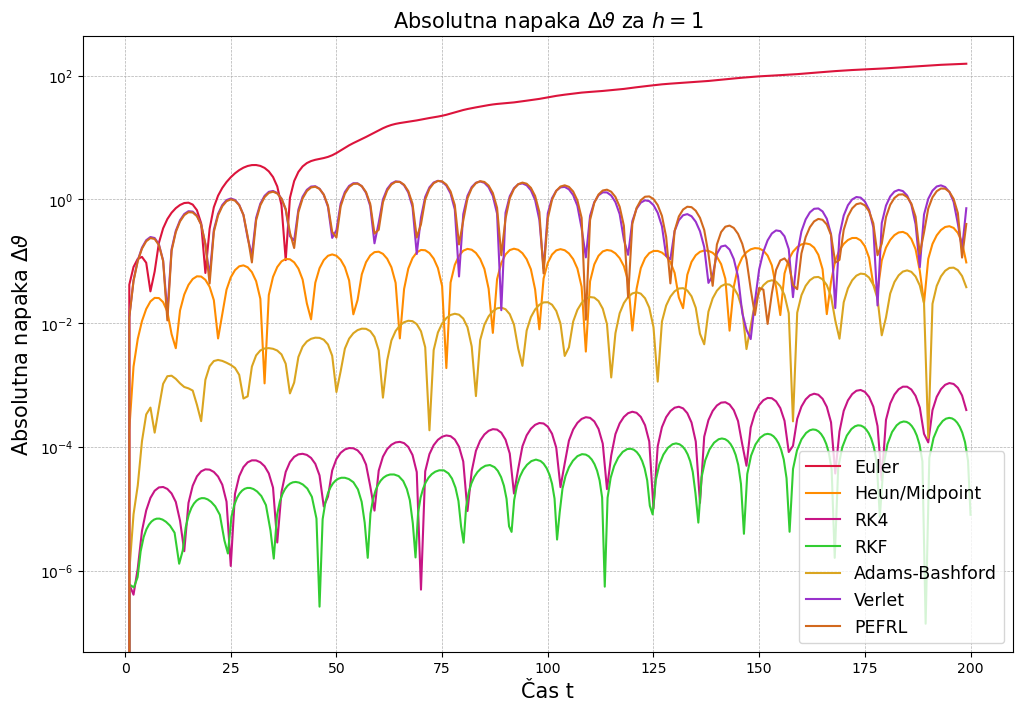

In [1079]:
def napake1():
    dt = 1
    t = np.arange(0.0, 200, dt)
    theta_0 = 1.0
    kotna_v_0 = 0.0
    omega_0 = 0.316  
    zac_pogoji = np.array([theta_0, kotna_v_0])

    anal = analiticno_mat_nihalo(theta_0, t)

    x_heun = heun(mat_nihalo_sistem, zac_pogoji, t)
    x_euler = euler(mat_nihalo_sistem, zac_pogoji, t)
    x_rk4, _ = rk45(mat_nihalo_sistem, zac_pogoji, t)
    t_rkf, x_rkf = rkf(mat_nihalo_sistem, 0, 200, zac_pogoji, 1e-6, 10, 0.001)
    anal_rkf = analiticno_mat_nihalo(theta_0, t_rkf)
    x_pc = pc4(mat_nihalo_sistem, zac_pogoji, t)
    x_verlet = verlet(mat_nihalo_sila, theta_0, kotna_v_0, t)[0]
    x_pefrl = pefrl(mat_nihalo_sila, theta_0, kotna_v_0, t)[0]

    plt.figure(figsize=(12, 8))

    plt.plot(t, np.abs(anal - x_euler[:, 0]), color='crimson', label='Euler')
    plt.plot(t, np.abs(anal - x_heun[:, 0]), color='darkorange', label='Heun/Midpoint')
    plt.plot(t, np.abs(anal - x_rk4[:, 0]), color='mediumvioletred', label='RK4')
    plt.plot(t_rkf, np.abs(anal_rkf - x_rkf[:, 0]), color='limegreen', label='RKF')
    plt.plot(t, np.abs(anal - x_pc[:, 0]), color='goldenrod', label='Adams-Bashford')
    plt.plot(t, np.abs(anal - x_verlet), color='darkorchid', label='Verlet')
    plt.plot(t, np.abs(anal - x_pefrl), color='chocolate', label='PEFRL')

    plt.yscale('log')
    plt.xlabel('Čas t', fontsize=15)
    plt.ylabel('Absolutna napaka $\Delta \\vartheta$', fontsize=15)
    plt.legend(fontsize=12.5)
    plt.title('Absolutna napaka $\Delta \\vartheta$ za $h = 1$', fontsize=15)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig('vse napake od t h 1')
    plt.show()

napake1()

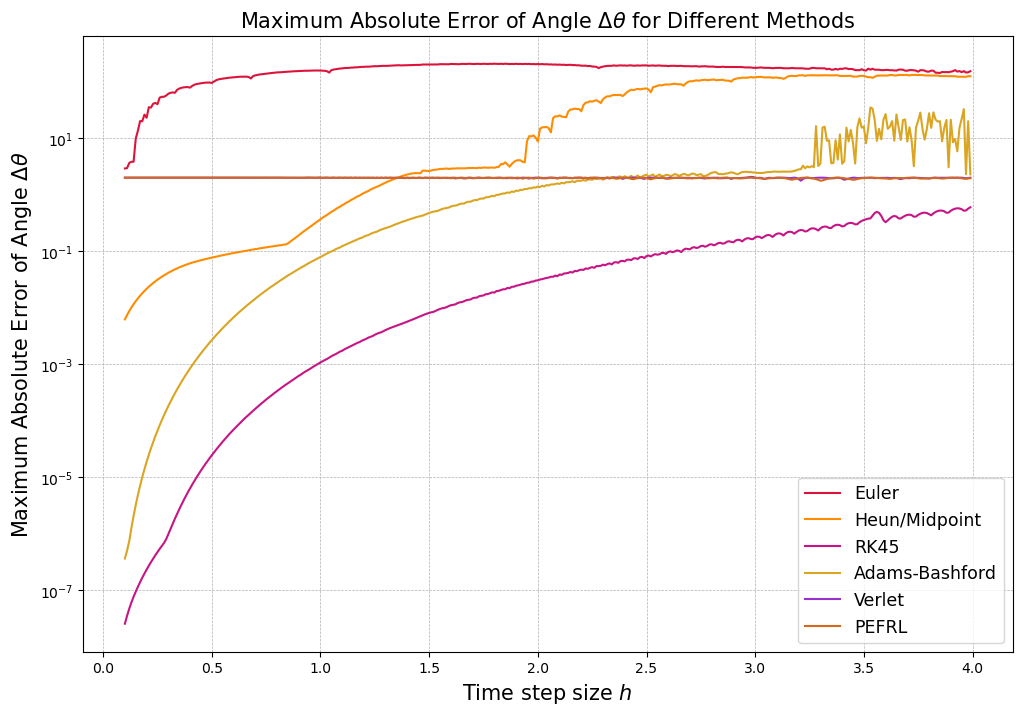

In [1026]:
def napake2():
    dt = np.arange(0.1, 4, 0.01)
    theta_0 = 1.0
    kotna_v_0 = 0.0
    omega_0 = 0.316  # Ensure omega_0 is defined
    zac_pogoji = np.array([theta_0, kotna_v_0])

    abs_errors = []
    
    # List of methods to apply
    methods = [euler, heun, rk45, pc4, verlet, pefrl]
    
    for method in methods:
        abs_errors_method = []
        
        for dti in dt:
            t = np.arange(0.0, 200, dti)
            anal = analiticno_mat_nihalo(theta_0, t)
            
            if method == rk45:
                # RK45 returns a tuple; we take the first element (the solution)
                x = method(mat_nihalo_sistem, zac_pogoji, t)[0][:, 0]
            elif method == verlet or method == pefrl:
                # Verlet and PEFRL also return a tuple; we take the first element (the solution)
                x = method(mat_nihalo_sila, theta_0, kotna_v_0, t)[0]
            else:
                # Euler, Heun, and PC4 return arrays directly
                x = method(mat_nihalo_sistem, zac_pogoji, t)[:, 0]
            
            # Calculate absolute errors and find the maximum error for this step size
            absi = [np.abs(anal[i] - x[i]) for i in range(len(anal))]
            abs_errors_method.append(max(absi))
        
        abs_errors.append(abs_errors_method)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(dt, abs_errors[0], color='crimson', label='Euler')
    plt.plot(dt, abs_errors[1], color='darkorange', label='Heun/Midpoint')
    plt.plot(dt, abs_errors[2], color='mediumvioletred', label='RK45')
    plt.plot(dt, abs_errors[3], color='goldenrod', label='Adams-Bashford')
    plt.plot(dt, abs_errors[4], color='darkorchid', label='Verlet')
    plt.plot(dt, abs_errors[5], color='chocolate', label='PEFRL')
    
    plt.yscale('log')
    plt.xlabel('Time step size $h$', fontsize=15)
    plt.ylabel('Maximum Absolute Error of Angle $\\Delta \\theta$', fontsize=15)
    plt.legend(fontsize=12.5)
    plt.title('Maximum Absolute Error of Angle $\\Delta \\theta$ for Different Methods', fontsize=15)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Uncomment to run the function
napake2()


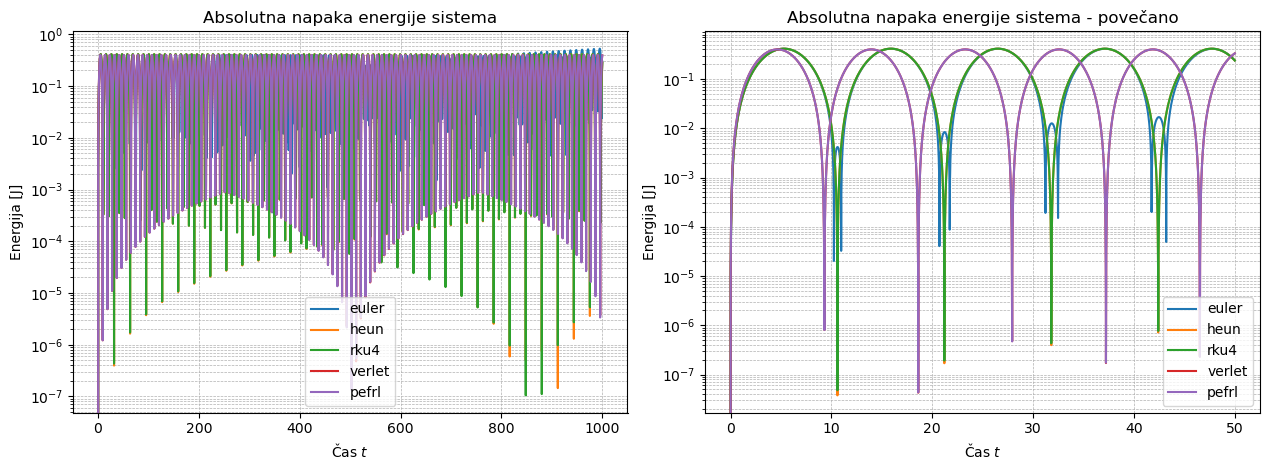

In [1037]:
from scipy.signal import find_peaks

fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(12.8, 4.8))

for metoda in [euler, heun, rku4, verlet, pefrl]:
    ax2.set_title('Absolutna napaka energije sistema')
    ax2.set_xlabel('Čas $t$')
    ax2.set_ylabel('Energija [J]')
    ax2.set_yscale('log')

    ax3.set_title('Absolutna napaka energije sistema - povečano')
    ax3.set_xlabel('Čas $t$')
    ax3.set_ylabel('Energija [J]')
    ax3.set_yscale('log')

    t = np.arange(0, 1000, 0.01)
    if metoda in [euler, heun, rku4]:
        x_vec = metoda(mat_nihalo_sistem, np.array([1., 0.]), t)
        x = x_vec[:, 0]
        v = x_vec[:, 1]
    else:
        (x, v) = metoda(mat_nihalo_sila, 1., 0., t)

    peaks, _ = find_peaks(x)
    theta = analiticno_mat_nihalo(theta_0, t)
    diff = np.abs(theta - x)
    E0 = 1.0 - np.cos(1.0)
    p = 30
    energy = np.abs(1 - np.cos(x) + v**2 / 2 - E0)

    ax2.plot(t[::p], energy[::p], label=f'{metoda.__name__}')
    ax3.plot(t[:5000], energy[:5000], label=f'{metoda.__name__}')

ax2.legend()
ax3.legend()

for ax in [ax2, ax3]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('odstopanje_energije_side_by_side.png', dpi=300)
plt.show()


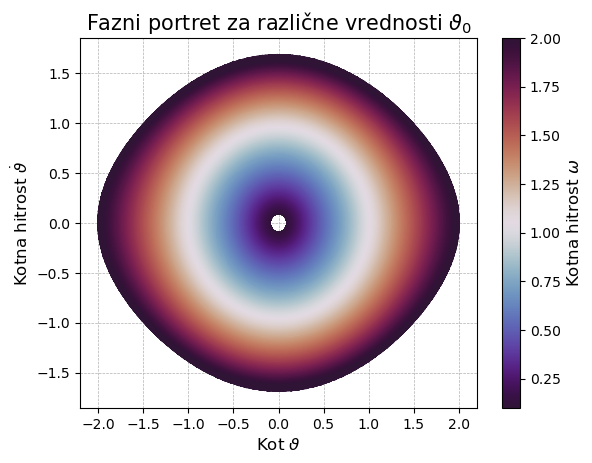

In [1038]:
def Fazni1(dt=0.5):
    t = np.arange(0.0, 200, dt)
    theta_values = np.linspace(0.1, 2.0, 1000) 
    kotna_v_0 = 0.0
    omega_0 = 1.0  

    cmap = cm.twilight_shifted
    norm = mcolors.Normalize(vmin=theta_values.min(), vmax=theta_values.max())
    colors = cmap(norm(theta_values))

    fig = plt.figure()
    ax = plt.axes()

    for i, theta_0 in enumerate(theta_values):
        def sila(y, omega_0=omega_0):
            return -omega_0**2 * np.sin(y)

        x_pefrl = pefrl(sila, theta_0, kotna_v_0, t)
        x = x_pefrl[0]
        v = x_pefrl[1]

        ax.plot(x, v, color=colors[i], label=rf'$\vartheta_0 = {round(theta_0, 2)}$')

    ax.set_title('Fazni portret za različne vrednosti $\\vartheta_0$', fontsize=15)
    ax.set_xlabel(r'Kot $\vartheta$', fontsize=12)
    ax.set_ylabel(r'Kotna hitrost $\dot{\vartheta}$', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    smap = cm.ScalarMappable(norm=norm, cmap=cmap)
    smap.set_array([])
    cbar = plt.colorbar(smap, ax=ax)
    cbar.set_label(r'Kotna hitrost $\omega$', fontsize=12)
    plt.savefig('fazni thete 0,5')
    plt.show()

Fazni1()



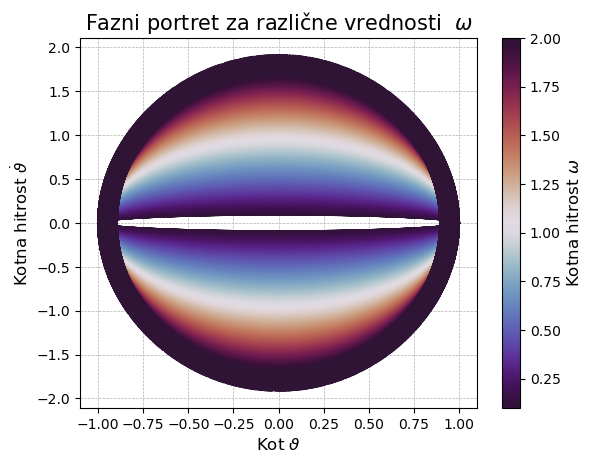

In [1039]:
def Fazni2(dt=0.5):
    t = np.arange(0.0, 200, dt)
    theta_0 = 1.0  
    kotna_v_0 = 0.0
    omega_values = np.linspace(0.1, 2.0, 1000)  

    cmap = cm.twilight_shifted
    norm = mcolors.Normalize(vmin=omega_values.min(), vmax=omega_values.max())
    colors = cmap(norm(omega_values))

    fig, ax = plt.subplots()

    for i, omega_0 in enumerate(omega_values):
        def sila(y, omega_0=omega_0):
            return -omega_0**2 * np.sin(y)

        x_pefrl = pefrl(sila, theta_0, kotna_v_0, t)
        x = x_pefrl[0]
        v = x_pefrl[1]

        ax.plot(x, v, color=colors[i])

    ax.set_title('Fazni portret za različne vrednosti  $\omega$', fontsize=15)
    ax.set_xlabel(r'Kot $\vartheta$', fontsize=12)
    ax.set_ylabel(r'Kotna hitrost $\dot{\vartheta}$', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    smap = cm.ScalarMappable(norm=norm, cmap=cmap)
    smap.set_array([])
    cbar = plt.colorbar(smap, ax=ax)
    cbar.set_label(r'Kotna hitrost $\omega$', fontsize=12)
    plt.savefig('fazni omege 0,5')
    plt.show()

Fazni2()


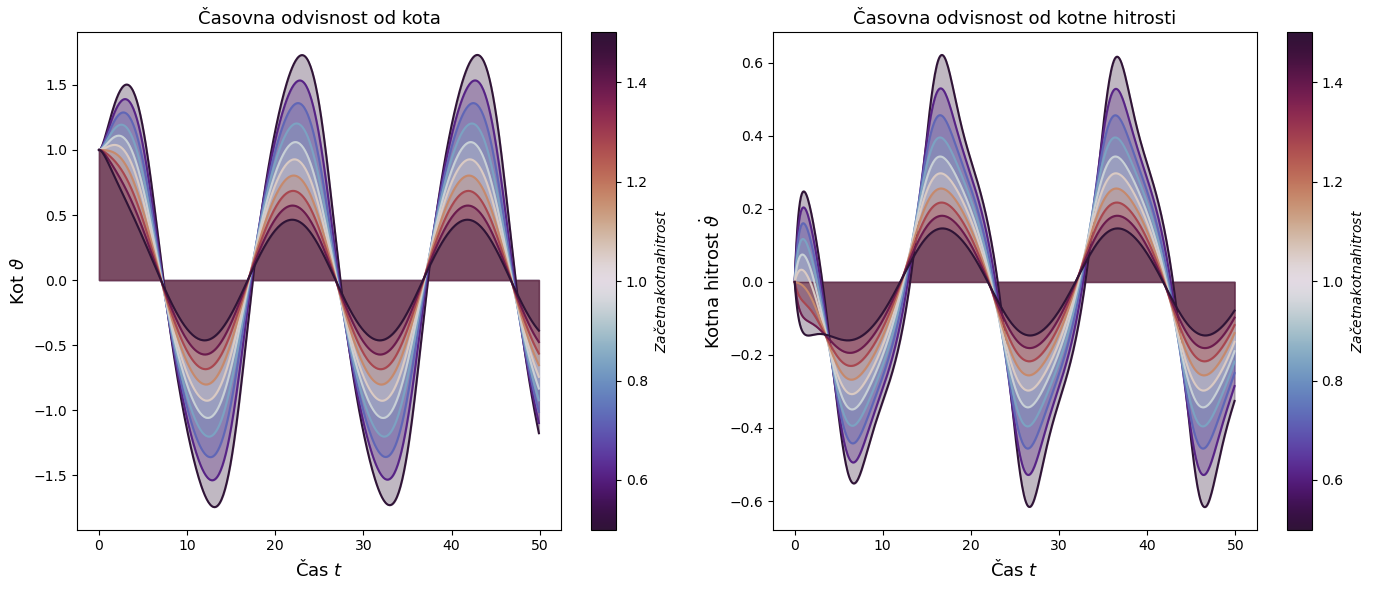

In [1042]:
def Duseno():
    dt = 0.1 
    t = np.arange(0.0, 50, dt)
    theta_0 = 1
    kotna_v_0 = 0.0
    zac_pogoji = np.array([theta_0, kotna_v_0])

    v_values = np.linspace(0.5, 1.5, 10)[::-1]
    colors = plt.cm.twilight_shifted(np.linspace(0, 1, len(v_values)))

    fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

    for i, v_zun in enumerate(v_values):
        def duseno_nihalo(y, t, v_zun, omega=1, beta=2, omega_0=0.316):  # Reduce beta
            theta, kot_v = y
            kot_posp = v_zun * np.cos(omega_0 * t) - omega**2 * np.sin(theta) - beta * kot_v
            dydt = np.array([kot_v, kot_posp])
            return dydt

        x_rk = rk45(lambda y, t: duseno_nihalo(y, t, v_zun), zac_pogoji, t)
        theta = x_rk[0][:, 0]
        kotna_v = x_rk[0][:, 1]

        ax[0].plot(t, theta, color=colors[i])
        ax[0].fill_between(t, theta, color=colors[i], alpha=0.3)

        ax[1].plot(t, kotna_v, color=colors[i])
        ax[1].fill_between(t, kotna_v, color=colors[i], alpha=0.3)

    norm = mpl.colors.Normalize(vmin=min(v_values), vmax=max(v_values))
    smap = mpl.cm.ScalarMappable(norm=norm, cmap='twilight_shifted')
    smap.set_array([])

    fig.colorbar(smap, ax=ax[0], orientation='vertical', label=r'$Začetna kotna hitrost$')
    fig.colorbar(smap, ax=ax[1], orientation='vertical', label=r'$Začetna kotna hitrost$')

    ax[0].set_xlabel('Čas $t$', fontsize=13)
    ax[0].set_ylabel(r'Kot $\vartheta$', fontsize=13)
    ax[0].set_title('Časovna odvisnost od kota', fontsize=13)

    ax[1].set_xlabel('Čas $t$', fontsize=13)
    ax[1].set_ylabel(r'Kotna hitrost $\dot{\vartheta}$', fontsize=13)
    ax[1].set_title('Časovna odvisnost od kotne hitrosti', fontsize=13)

    plt.tight_layout()
    plt.savefig('Duseno_plot_0_1.png')  
    plt.show()

Duseno()

